## __Logistic Regression__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

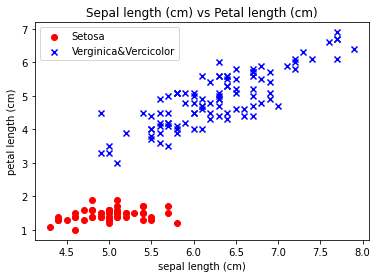

In [4]:
# Get labels
labels = iris_data.iloc[:,4]
# Make Setosa = 0, others = 1
y = np.where(labels == 0,0,1)
# Get the two features that will be used 
X = iris_data.iloc[:,[0,2]]
# bias term added 
X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

# Plot
# Seperate two catogories
X_target = iris_data[iris_data['target'] == 0]
X_others = iris_data[iris_data['target'] != 0]
# Scatter plot
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Setosa')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Verginica&Vercicolor')
plt.title('Sepal length (cm) vs Petal length (cm)')
plt.legend(loc='upper left',prop={'size': 10})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

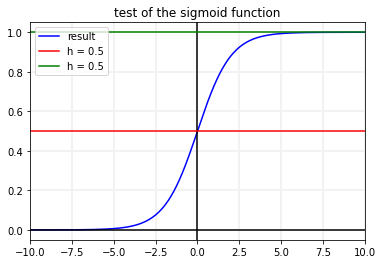

In [6]:
x1 = np.linspace(-10,10,1000)
plt.plot(x1,sigmoid(x1),c='b',label='result')
plt.grid(axis='both',color='0.95', linestyle='-', linewidth=2)
plt.title('test of the sigmoid function')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x1,np.full(x1.shape,0.5), c='r',label='h = 0.5')
plt.plot(x1,np.full(x1.shape,1), c='g',label='h = 0.5')
plt.legend(loc='upper left')
plt.xlim([-10,10]) 
plt.show()

Cost function   
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$  

In [7]:
def cost(Y,y):
    eps = 1e-15 # To avoid numerical error at log(0)
    return (-y * np.log(Y + eps) - (1 - y) * np.log(1 - Y + eps)).mean() # np array * is equivalent to np.multiply elementwise multiplication

def cost_plot(loss):
    plt.plot(range(1,len(loss)+1),loss)
    plt.title('Cost vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

def predict(X,W):
    return sigmoid(np.dot(X,W))

def gradient(X,Y,y):
    return np.dot(X.T,(Y-y))

def fit(X,y,alpha,n_iter):
    W = np.zeros(X.shape[1]) 
    loss_list = []
    for i in range(n_iter):
      Y = sigmoid(np.dot(X,W))
      W = W - alpha * (gradient(X,Y,y) / y.size)
      loss = cost(Y,y)
      loss_list.append(loss)

      if i%100 == 0:
        print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    cost_plot(loss_list)
    
    return W # return the final weights as an array


iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.23820942493735064 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.16748536782748724 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.1457605274625624 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.10521991405430549 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0

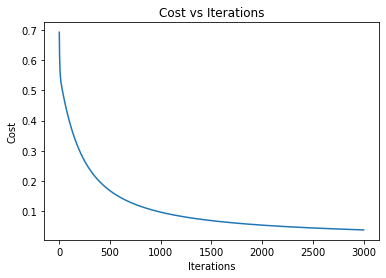

In [8]:
alpha = 0.01
n_iter = 3000
model_weights = fit(X,y,alpha,n_iter)

In [9]:
predictions = predict(X,model_weights)
predictions = predictions.round()
predictions = predictions.astype('int')

true = y.astype('int')
print(predictions - true)
true

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Evaluation Metrics

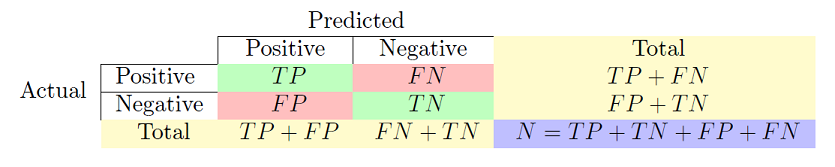

In [10]:
# Here orders change compared to the figure above
# TN  FP
# FN  TP
def compute_confusion_matrix(true,pred):
    num_cls = len(np.unique(true))
    result = np.zeros((num_cls,num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1 # can only be [0][0] [0][1] [1][0] [1][1]
    
    return result.astype('int')

In [11]:
# test confusion matrix
from sklearn.metrics import confusion_matrix
y_actu = [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
print(confusion_matrix(y_actu, y_pred))
print(compute_confusion_matrix(y_actu,y_pred))

[[4 1]
 [2 5]]
[[4 1]
 [2 5]]


Confusion matrix result:
[[ 50   0]
 [  0 100]]
accuracy = 100.00%


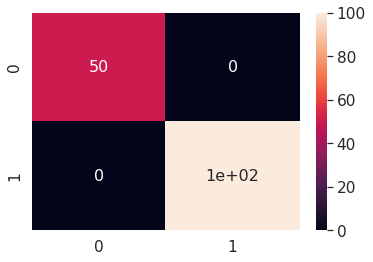

In [12]:
conf_matrix = compute_confusion_matrix(true,predictions)
print('Confusion matrix result:')
print(conf_matrix)
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

# Task 1

In [13]:
# generating 80% training data and 20% test data from the original dataset
training_data = iris_data.sample(frac=0.8, random_state=25)
testing_data = iris_data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")
training_data

No. of training examples: 120
No. of testing examples: 30


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
28,5.2,3.4,1.4,0.2,0
72,6.3,2.5,4.9,1.5,1
70,5.9,3.2,4.8,1.8,1
85,6.0,3.4,4.5,1.6,1
128,6.4,2.8,5.6,2.1,2
...,...,...,...,...,...
104,6.5,3.0,5.8,2.2,2
101,5.8,2.7,5.1,1.9,2
30,4.8,3.1,1.6,0.2,0
98,5.1,2.5,3.0,1.1,1


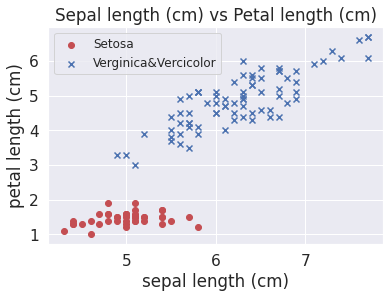

In [14]:
X_train = training_data.iloc[:,[0,2]]
labels_train = training_data.iloc[:,4]
y_train = np.where(labels_train==0,0,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)

# Plot
X_target = training_data[training_data['target'] == 0]
X_others = training_data[training_data['target'] != 0]
# Scatter plot
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Setosa')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Verginica&Vercicolor')
plt.title('Sepal length (cm) vs Petal length (cm)')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.0015     0.01157083 0.01327083] 	
iteration: 101 	 cost: 0.40592720893340634 	 weights: [-0.05380733 -0.08759481  0.42751035] 	
iteration: 201 	 cost: 0.3056518749418174 	 weights: [-0.10978317 -0.24207547  0.69659041] 	
iteration: 301 	 cost: 0.2425862816155502 	 weights: [-0.15371025 -0.36139693  0.91211717] 	
iteration: 401 	 cost: 0.2003960805891244 	 weights: [-0.18940041 -0.45722462  1.0895861 ] 	
iteration: 501 	 cost: 0.1705690819950885 	 weights: [-0.21927029 -0.53673203  1.23951081] 	
iteration: 601 	 cost: 0.14850606228533225 	 weights: [-0.24487018 -0.60442192  1.36890539] 	
iteration: 701 	 cost: 0.13158041153858205 	 weights: [-0.26722914 -0.66323472  1.48254266] 	
iteration: 801 	 cost: 0.11820788726912702 	 weights: [-0.28705587 -0.7151697   1.5837658 ] 	
iteration: 901 	 cost: 0.10738538952790819 	 weights: [-0.30485525 -0.76163655  1.67498617] 	
iteration: 1001 	 cost: 0.09845060259107002 	 weights: [-0.32099794 -0

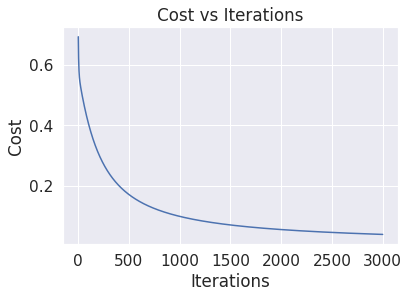

In [15]:
W_final = fit(X_train,y_train,alpha,n_iter)

predictions: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
true values: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[ 8  0]
 [ 0 22]]
accuracy = 100.00%


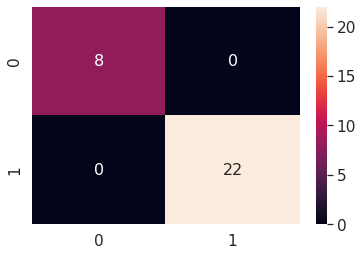

In [16]:
# Get and configure the test data
X_test = testing_data.iloc[:,[0,2]]
labels_test = testing_data.iloc[:,4]
y_test = np.where(labels_test==0,0,1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

predictions = predict(X_test,W_final)
pred = predictions.round().astype('int')
print('predictions:',pred)
true = y_test.astype('int')
print('true values:',true)
# confusion matrix
conf_matrix = compute_confusion_matrix(true,pred)
print('Confusion matrix result:')
print(conf_matrix)
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()


In [17]:
def plot_boundary(W,data):
    
    # Plot
    X_target = data[data['target'] == 0]
    X_others = data[data['target'] != 0]

    xx1,xx2 = np.meshgrid(np.arange(0,8,0.02),(0,8,0.02))
    plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Setosa')
    plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Verginica&Vercicolor')
    plt.legend(loc='upper left',prop={'size': 12})
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)') 
    plt.contour(xx1,xx2,W[0]+W[1]*xx1+W[2]*xx2,levels=[0])
    plt.show()

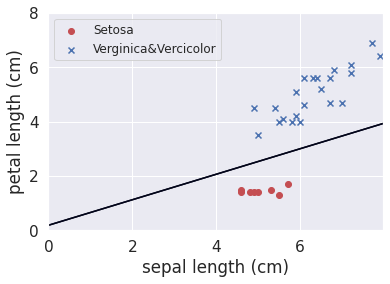

In [18]:
plot_boundary(W_final,testing_data)
# we can also observe from the plot that the boundary perfectly seperates the testing data so it is obvious that the accuracy is 100%

#Task 2
__1. Versicolor vs others__

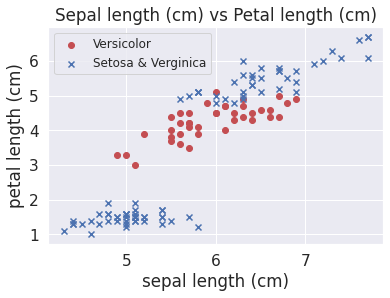

In [19]:
# Firstly, get the data and plot 
training_data = iris_data.sample(frac=0.8, random_state=25)
testing_data = iris_data.drop(training_data.index)

X_train = training_data.iloc[:,[0,2]]
labels_train = training_data.iloc[:,4]
y_train = np.where(labels_train==1,0,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)

# Plot
X_target = training_data[training_data['target'] == 1]
X_others = training_data[training_data['target'] != 1]
# Scatter plot
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Versicolor')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Setosa & Verginica')
plt.title('Sepal length (cm) vs Petal length (cm)')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.00924583 0.00417083] 	
iteration: 101 	 cost: 0.6285698867576706 	 weights: [ 0.03505361  0.15037797 -0.0822063 ] 	
iteration: 201 	 cost: 0.615133199046871 	 weights: [ 0.05167354  0.21302405 -0.17759382] 	
iteration: 301 	 cost: 0.6072395637158381 	 weights: [ 0.06330344  0.26164148 -0.25053473] 	
iteration: 401 	 cost: 0.6024791475600495 	 weights: [ 0.07124105  0.29983736 -0.30707603] 	
iteration: 501 	 cost: 0.5995406663940201 	 weights: [ 0.07640602  0.3301802  -0.35142854] 	
iteration: 601 	 cost: 0.5976896534757247 	 weights: [ 0.07945881  0.35452214 -0.38657039] 	
iteration: 701 	 cost: 0.5965025766235292 	 weights: [ 0.08088182  0.37422048 -0.41464878] 	
iteration: 801 	 cost: 0.5957286502973312 	 weights: [ 0.0810334   0.39028635 -0.43724177] 	
iteration: 901 	 cost: 0.5952159164471998 	 weights: [ 0.08018405  0.40348459 -0.45552976] 	
iteration: 1001 	 cost: 0.5948704783093649 	 weights: [ 0.07854076  0.414401

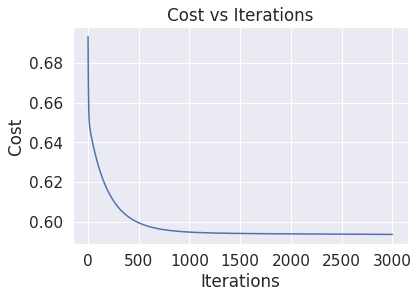

In [20]:
# Then we train 
W_final = fit(X_train,y_train,alpha,n_iter)

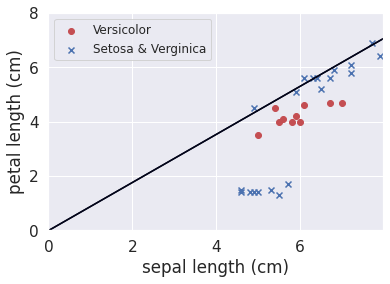

predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1]
true values: [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[ 0 10]
 [ 4 16]]
accuracy = 53.33%


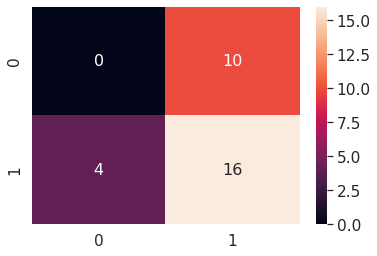

In [21]:
X_target = testing_data[testing_data['target'] == 1]
X_others = testing_data[testing_data['target'] != 1]

xx1,xx2 = np.meshgrid(np.arange(0,8,0.02),(0,8,0.02))
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Versicolor')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Setosa & Verginica')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)') 
plt.contour(xx1,xx2,W_final[0]+W_final[1]*xx1+W_final[2]*xx2,levels=[0])
plt.show()

# Get and configure the test data
X_test = testing_data.iloc[:,[0,2]]
labels_test = testing_data.iloc[:,4]
y_test = np.where(labels_test==1,0,1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
predictions = predict(X_test,W_final)
pred = predictions.round().astype('int')
print('predictions:',pred)
true = y_test.astype('int')
print('true values:',true)
# confusion matrix
conf_matrix = compute_confusion_matrix(true,pred)
print('Confusion matrix result:')
print(conf_matrix)
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00083333 0.00462292 0.00208542 0.02676688 0.01076479] 	
iteration: 101 	 cost: 0.627174473851497 	 weights: [ 0.00513935  0.01282197 -0.0527135   0.04162639 -0.03839546] 	
iteration: 201 	 cost: 0.6223416703783405 	 weights: [ 0.00784507  0.0154198  -0.10138786  0.04372132 -0.03311092] 	
iteration: 301 	 cost: 0.6176722459635923 	 weights: [ 0.01078526  0.01876399 -0.14915638  0.04553834 -0.02772171] 	
iteration: 401 	 cost: 0.6131540121391533 	 weights: [ 0.01395203  0.02283479 -0.19606622  0.04715412 -0.02236265] 	
iteration: 501 	 cost: 0.6087759843820383 	 weights: [ 0.01733211  0.02759139 -0.24215234  0.04857929 -0.01703364] 	
iteration: 601 	 cost: 0.6045281377801396 	 weights: [ 0.02091284  0.03299487 -0.28744817  0.0498238  -0.01173423] 	
iteration: 701 	 cost: 0.6004013282719557 	 weights: [ 0.02468217  0.03900812 -0.33198571  0.05089717 -0.00646403] 	
iteration: 801 	 cost: 0.5963872183006452 	 weights: [ 0.02862864  0.045

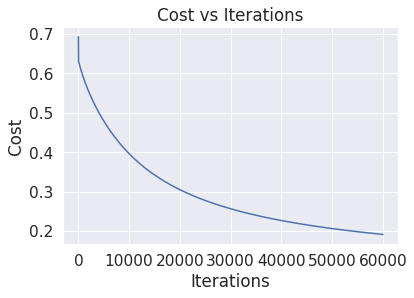

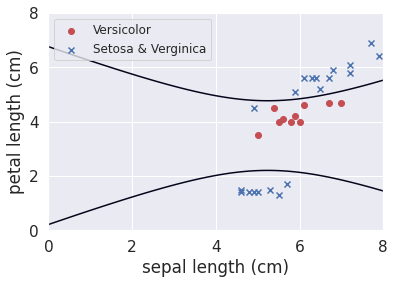

In [22]:
# transformation
labels_train = training_data.iloc[:,4]
y_train = np.where(labels_train==1,0,1)
X_train = training_data.iloc[:,[0,2]]
add = X_train.apply(np.square)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_train = np.concatenate((X_train,add),axis=1)
W_final = fit(X_train,y_train,0.005,60000)
#X_train = X_train.apply(np.square)
#X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
#W_final = fit(X_train,y_train,0.005,20000)
# plot
X_target = testing_data[testing_data['target'] == 1]
X_others = testing_data[testing_data['target'] != 1]
xx1,xx2 = np.meshgrid(np.linspace(0,8,1000),np.linspace(0,8,1000))
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Versicolor')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Setosa & Verginica')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)') 
plt.contour(xx1,xx2,W_final[0]+W_final[1]*xx1+W_final[2]*xx2+W_final[3]*xx1**2+W_final[4]*xx2**2,levels=[0])
plt.show()





predictions: [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
true values: [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[10  0]
 [ 1 19]]
accuracy = 96.67%


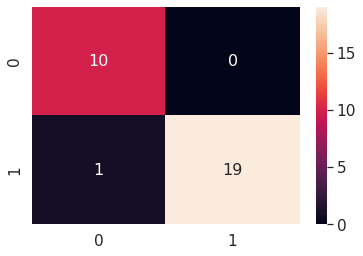

In [23]:
# Get and configure the test data
labels_test = testing_data.iloc[:,4]
y_test = np.where(labels_test==1,0,1)
X_test = testing_data.iloc[:,[0,2]]
addt = X_test.apply(np.square)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
X_test = np.concatenate((X_test,addt),axis=1)
#X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
predictions = predict(X_test,W_final)
pred = predictions.round().astype('int')
print('predictions:',pred)
true = y_test.astype('int')
print('true values:',true)
# confusion matrix
conf_matrix = compute_confusion_matrix(true,pred)
print('Confusion matrix result:')
print(conf_matrix)
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

__2.Verginica vs others__

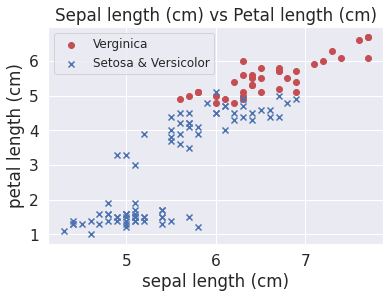

In [29]:
# Get the right data and plot
X_train = training_data.iloc[:,[0,2]]
labels_train = training_data.iloc[:,4]
y_train = np.where(labels_train == 2,0,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)

X_target = training_data[training_data['target'] == 2]
X_others = training_data[training_data['target'] != 2]
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Verginica')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Setosa & Versicolor')
plt.title('Sepal length (cm) vs Petal length (cm)')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00183333 0.00824583 0.00095417] 	
iteration: 101 	 cost: 0.553650694730261 	 weights: [ 0.07948237  0.23127314 -0.24956859] 	
iteration: 201 	 cost: 0.4852917283554831 	 weights: [ 0.1353125   0.37096221 -0.46201685] 	
iteration: 301 	 cost: 0.4417737073287836 	 weights: [ 0.18141896  0.48399399 -0.63033914] 	
iteration: 401 	 cost: 0.4118200614458357 	 weights: [ 0.22087063  0.57874218 -0.76916611] 	
iteration: 501 	 cost: 0.3898588158640399 	 weights: [ 0.25559245  0.66046538 -0.88746191] 	
iteration: 601 	 cost: 0.3729415808864662 	 weights: [ 0.28682431  0.73255883 -0.99087257] 	
iteration: 701 	 cost: 0.3593969289236776 	 weights: [ 0.3153941   0.79729492 -1.08309436] 	
iteration: 801 	 cost: 0.348217543702879 	 weights: [ 0.34187455  0.85624907 -1.16664178] 	
iteration: 901 	 cost: 0.33876372813811717 	 weights: [ 0.3666749   0.91054889 -1.24328577] 	
iteration: 1001 	 cost: 0.33061082083960625 	 weights: [ 0.39009601  0.96102

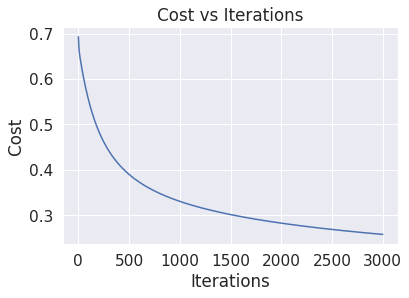

In [30]:
# train using training data
W_final = fit(X_train,y_train,alpha,n_iter)

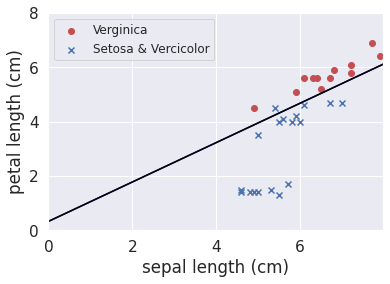

In [32]:
# Plot the final decision boundary
X_target = testing_data[testing_data['target'] == 2]
X_others = testing_data[testing_data['target'] != 2]

xx1,xx2 = np.meshgrid(np.arange(0,8,0.02),(0,8,0.02))
plt.scatter(X_target['sepal length (cm)'],X_target['petal length (cm)'],c='r',marker='o',label='Verginica')
plt.scatter(X_others['sepal length (cm)'],X_others['petal length (cm)'],c='b',marker='x',label='Setosa & Vercicolor')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)') 
plt.contour(xx1,xx2,W_final[0]+W_final[1]*xx1+W_final[2]*xx2,levels=[0])
plt.show()

predictions: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
true values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion matrix result:
[[12  0]
 [ 1 17]]
accuracy = 96.67%


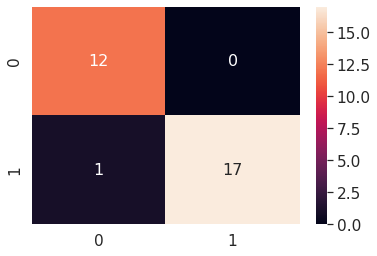

In [33]:
# Get and configure the test data
X_test = testing_data.iloc[:,[0,2]]
labels_test = testing_data.iloc[:,4]
y_test = np.where(labels_test==2,0,1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
predictions = predict(X_test,W_final)
pred = predictions.round().astype('int')
print('predictions:',pred)
true = y_test.astype('int')
print('true values:',true)
# confusion matrix
conf_matrix = compute_confusion_matrix(true,pred)
print('Confusion matrix result:')
print(conf_matrix)
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

# Task 3
effect of learning rate   
use setosa vs others classifier

In [44]:
# Get and configure training data
X_train = training_data.iloc[:,[0,2]]
labels_train = training_data.iloc[:,4]
y_train = np.where(labels_train==0,0,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
# Get and configure test data
X_test = testing_data.iloc[:,[0,2]]
labels_test = testing_data.iloc[:,4]
y_test = np.where(labels_test==0,0,1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [61]:
def cf_mat(X_test,W_final,y_test):
    predictions = predict(X_test,W_final)
    pred = predictions.round().astype('int')
    print('predictions:',pred)
    true = y_test.astype('int')
    print('true values:',true)
    # confusion matrix
    conf_matrix = compute_confusion_matrix(true,pred)
    print('Confusion matrix result:')
    print(conf_matrix)
    diagonal_sum = conf_matrix.trace()
    sum_of_all_elements = conf_matrix.sum()
    accuracy = diagonal_sum / sum_of_all_elements
    print('accuracy = {:0.2f}%'.format(accuracy*100))
    df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
    # plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.show()

def train(X,y,alpha,n_iter,display_step):
    W = np.zeros(X.shape[1]) 
    loss_list = []
    for i in range(n_iter):
      Y = sigmoid(np.dot(X,W))
      W = W - alpha * (gradient(X,Y,y) / y.size)
      loss = cost(Y,y)
      loss_list.append(loss)

      if i%display_step == 0:
        print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    cost_plot(loss_list)
    
    return W,loss_list # return the final weights as an array

iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.50000000e-05 1.15708333e-04 1.32708333e-04] 	
iteration: 101 	 cost: 0.6653198828812721 	 weights: [0.00137273 0.01083038 0.012813  ] 	
iteration: 201 	 cost: 0.6432643919147654 	 weights: [0.00247252 0.01999253 0.02442154] 	
iteration: 301 	 cost: 0.6256532423396983 	 weights: [0.00334728 0.02779993 0.03509391] 	
iteration: 401 	 cost: 0.6114605445960835 	 weights: [0.00402619 0.03442816 0.04495074] 	
iteration: 501 	 cost: 0.599900804321675 	 weights: [0.00453474 0.04003062 0.05409752] 	
iteration: 601 	 cost: 0.5903750505129094 	 weights: [0.00489499 0.04474011 0.06262556] 	
iteration: 701 	 cost: 0.5824268229131924 	 weights: [0.00512598 0.04867106 0.07061344] 	
iteration: 801 	 cost: 0.5757076823144497 	 weights: [0.00524406 0.05192183 0.07812861] 	
iteration: 901 	 cost: 0.5699508158755097 	 weights: [0.00526332 0.05457698 0.085229  ] 	
iteration: 1001 	 cost: 0.564951098060906 	 weights: [0.0051959  0.05670934 0.09196436] 	
i

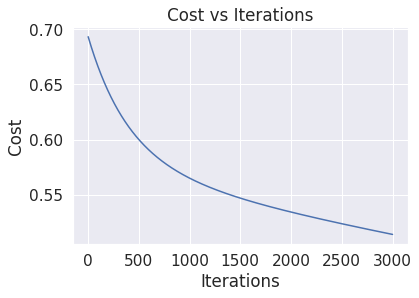

predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
true values: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[ 0  8]
 [ 0 22]]
accuracy = 73.33%


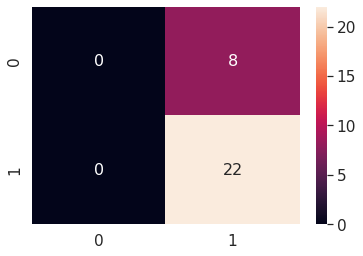

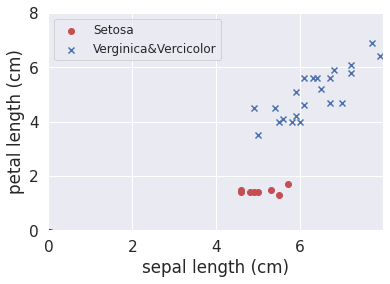

In [62]:
W_final_a0,loss0 = train(X_train,y_train,0.0001,n_iter,100)
cf_mat(X_test,W_final_a0,y_test)
plot_boundary(W_final_a0,testing_data)

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.015      0.11570833 0.13270833] 	
iteration: 101 	 cost: 0.09782609545454238 	 weights: [-0.32358357 -0.81031997  1.77118672] 	
iteration: 201 	 cost: 0.054607923862960504 	 weights: [-0.43278712 -1.09235725  2.33946393] 	
iteration: 301 	 cost: 0.03866814592482357 	 weights: [-0.49918167 -1.26280745  2.6904536 ] 	
iteration: 401 	 cost: 0.030272244636936063 	 weights: [-0.54714974 -1.38586698  2.94673689] 	
iteration: 501 	 cost: 0.025047603033885313 	 weights: [-0.58479748 -1.48253864  3.14955282] 	
iteration: 601 	 cost: 0.02146340144505127 	 weights: [-0.61582926 -1.56234331  3.31787851] 	
iteration: 701 	 cost: 0.018841625300938327 	 weights: [-0.6422518  -1.63041404  3.4620483 ] 	
iteration: 801 	 cost: 0.0168346124881247 	 weights: [-0.6652759  -1.68983853  3.58832481] 	
iteration: 901 	 cost: 0.015245180985946209 	 weights: [-0.68568893 -1.74262073  3.7007962 ] 	
iteration: 1001 	 cost: 0.013952911374828798 	 weights: [-0.70

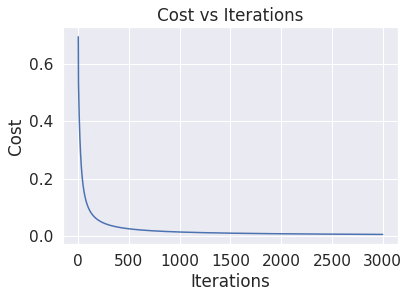

predictions: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
true values: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[ 8  0]
 [ 0 22]]
accuracy = 100.00%


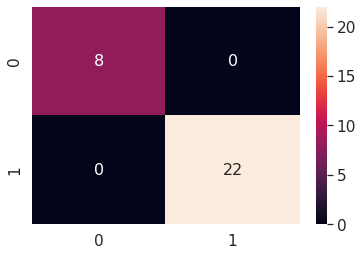

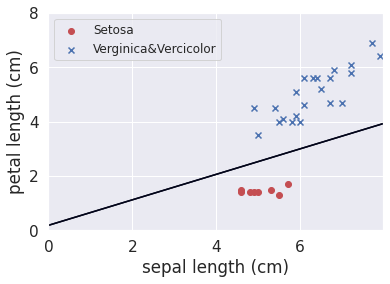

In [63]:
W_final_a1,loss1 = train(X_train,y_train,0.1,n_iter,100)
cf_mat(X_test,W_final_a1,y_test)
plot_boundary(W_final_a1,testing_data)

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.15       1.15708333 1.32708333] 	
iteration: 2 	 cost: 2.756717626386755 	 weights: [-0.19984423 -0.5913304   0.81480523] 	
iteration: 3 	 cost: 0.48701867402197574 	 weights: [0.06989264 1.13455799 2.23371445] 	
iteration: 4 	 cost: 3.1538255869277614 	 weights: [-0.28005388 -0.61435206  1.72128726] 	
iteration: 5 	 cost: 0.1459659450322193 	 weights: [-0.37283674 -1.06245787  1.62208411] 	
iteration: 6 	 cost: 0.28297371974776114 	 weights: [-0.18019345  0.12703708  2.52954358] 	
iteration: 7 	 cost: 1.4616007613318591 	 weights: [-0.52419068 -1.59253576  2.02534542] 	
iteration: 8 	 cost: 0.7465440690365005 	 weights: [-0.12089902  0.90069057  3.91080042] 	
iteration: 9 	 cost: 3.537449730698353 	 weights: [-0.47087778 -0.84837471  3.39832812] 	
iteration: 10 	 cost: 0.30728747867606715 	 weights: [-0.66706476 -1.82532095  3.10374416] 	
iteration: 11 	 cost: 0.08485891977532851 	 weights: [-0.60053384 -1.43226718  3.37990506] 	
i

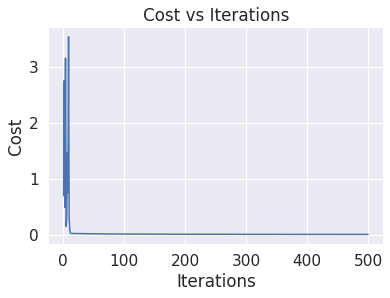

predictions: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
true values: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[ 8  0]
 [ 0 22]]
accuracy = 100.00%


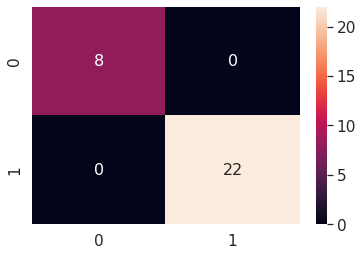

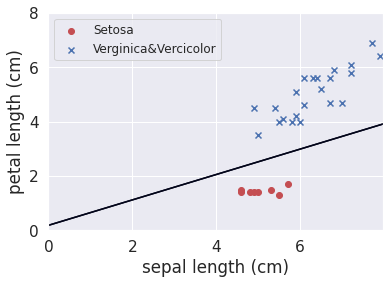

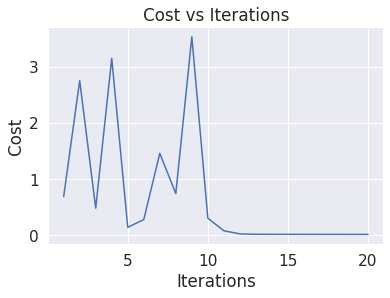

In [66]:
W_final_a2,loss2 = train(X_train,y_train,1,500,1) # since alpha is big now, it converges a lot faster (if it converges) so no need for a big n_iter
cf_mat(X_test,W_final_a2,y_test)
plot_boundary(W_final_a2,testing_data)

plt.plot(range(1,21),loss2[0:20])
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 150.         1157.08333333 1327.08333333] 	
iteration: 2 	 cost: 12.088571738218741 	 weights: [-200.         -592.08333333  814.58333333] 	
iteration: 3 	 cost: 9.498163509415566 	 weights: [  75.00000082 1053.75000497 1966.25000383] 	
iteration: 4 	 cost: 12.088571738218741 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	
iteration: 5 	 cost: -1.1102230246251561e-15 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	
iteration: 6 	 cost: -1.1102230246251561e-15 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	
iteration: 7 	 cost: -1.1102230246251561e-15 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	
iteration: 8 	 cost: -1.1102230246251561e-15 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	
iteration: 9 	 cost: -1.1102230246251561e-15 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	
iteration: 10 	 cost: -1.1102230246251561e-15 	 weights: [-274.99999918 -695.41666169 1453.75000383] 	


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


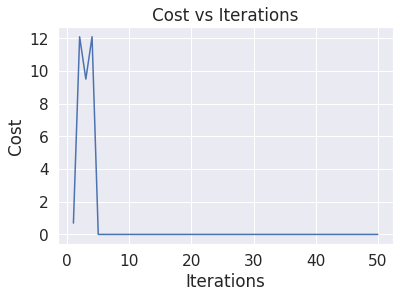

predictions: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
true values: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result:
[[ 8  0]
 [ 0 22]]
accuracy = 100.00%


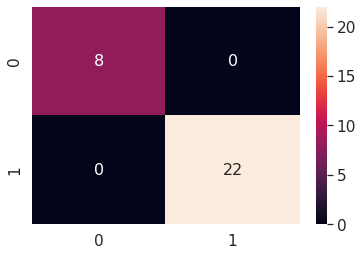

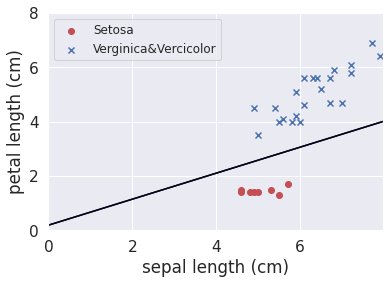

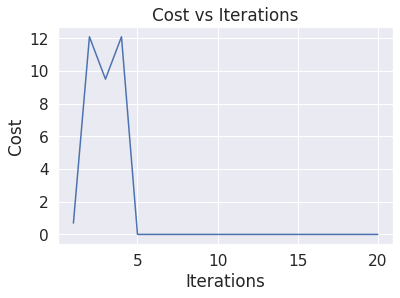

In [75]:
W_final_a3,loss3 = train(X_train,y_train,1000,50,1)
cf_mat(X_test,W_final_a3,y_test)
plot_boundary(W_final_a3,testing_data)

plt.plot(range(1,21),loss3[0:20])
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()